<a href="https://colab.research.google.com/github/alexandreimircea/PhDWork-ML-DL-/blob/main/WeightsCADModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAD weights - metabolomics + transcriptomics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import pointbiserialr, pearsonr, spearmanr, mannwhitneyu
from sklearn.linear_model import LogisticRegression, ARDRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
dataset= pd.read_excel('Metabolomics&DGECAD (1).xlsx')
target = dataset.iloc[-1, 1:]
target = target.map({'N':0, 'Y':1})
X = dataset.iloc[:-1, 1:]
X = X.T
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
RFmodel = cross_val_score(RandomForestClassifier(class_weight='balanced'), X, target, cv = 10)
SVMmodel = cross_val_score(SVC(class_weight='balanced'), X, target, cv = 10)
LRmodel = cross_val_score(LogisticRegression(max_iter = 500, class_weight='balanced'), X, target, cv = 10)
LDAmodel = cross_val_score(LinearDiscriminantAnalysis(), X, target, cv = 10)
print(np.mean(RFmodel), np.mean(SVMmodel), np.mean(LRmodel), np.mean(LDAmodel))

0.8761904761904761 0.9404761904761905 0.9690476190476192 0.9357142857142857


In [ ]:
dataset.iloc[:64,0] = ['FHAD1', 'None', 'SV2A', 'KLF11', 'GEN1', 'DARS1-AS1', 'FAP', 'COL3A1', 'LINC01614', 'PTPRN',
'SCG2', 'FAM240C', 'HSPA8P18', 'TRIM71', 'None', 'CNGA1', 'IBSP', 'SPP1', 'SLC39A8', 'ESM1',
'None', 'ARSI', 'UNC5A', 'N4BP3', 'None', 'None', 'PI15', 'CTHRC1', 'CCN4', 'LINC01235',
'ROR2', 'LINC02669', 'MANCR', 'ADAMTS14', 'UBQLNL', 'OR52T1P', 'OR52N1', 'P4HA3', 'None', 'LAYN',
'ENO2', 'None', 'RFLNA', 'RNASE10', 'None', 'SORD2P', 'SEMA7A', 'SCAMP5', 'ALDH1A3', 'None',
'CDH11', 'None', 'LRRC36', 'FOXL1', 'None', 'USP6', 'MEIS3P1', 'COL1A1', 'OACYLP', 'COMP',
'LNCTSI', 'None', 'FATE1', 'BGN'
]

In [ ]:
LR = LogisticRegression()
RF = RandomForestClassifier()
SVM = SVC()
LDA = LinearDiscriminantAnalysis()
cross_val_prediction_LR =  cross_val_predict(LR, X, target, cv=10, method='predict_proba')[:, 1]
cross_val_prediction_RF =  cross_val_predict(RF, X, target, cv=10, method='predict_proba')[:, 1]
cross_val_prediction_SVM =  cross_val_predict(SVM, X, target, cv=10, method='decision_function')
cross_val_prediction_LDA =  cross_val_predict(LDA, X, target, cv=10, method='predict_proba')[:, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2)
RF.fit(X_train, y_train)
LR.fit(X_train, y_train)
LDA.fit(X_train, y_train)
SVM.fit(X_train, y_train)

SVC()

In [ ]:
mdi_importances = pd.Series(
    RF.feature_importances_,
    index=dataset.iloc[:80,0]
)

In [ ]:
result = permutation_importance(
    SVM, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

In [ ]:
sorted_pairs = sorted(zip(LDA.coef_.flatten(), dataset.iloc[:80, 0]), key=lambda x: x[0])
sorted_coefs, sorted_labels = zip(*sorted_pairs)
fig= go.Figure(go.Bar(
            x=sorted_coefs,
            y=sorted_labels,
            orientation='h'))

fig.update_layout(
    height=30 * len(sorted_labels),
    yaxis=dict(tickmode='linear'),
    font=dict(size=22)
)

fig.show()

In [ ]:
sorted_pairs = sorted(zip(LR.coef_.flatten(), dataset.iloc[:80, 0]), key=lambda x: x[0])
sorted_coefs, sorted_labels = zip(*sorted_pairs)
fig= go.Figure(go.Bar(
            x=sorted_coefs,
            y=sorted_labels,
            orientation='h'))

fig.update_layout(
    height=30 * len(sorted_labels),
    yaxis=dict(tickmode='linear'),
    font=dict(size=22)
)

fig.show()

In [ ]:
sorted_pairs = sorted(zip(mdi_importances, dataset.iloc[:80, 0]), key=lambda x: x[0])
sorted_coefs, sorted_labels = zip(*sorted_pairs)
fig= go.Figure(go.Bar(
            x=sorted_coefs,
            y=sorted_labels,
            orientation='h'))

fig.update_layout(
    height=30 * len(sorted_labels),
    yaxis=dict(tickmode='linear'),
    font=dict(size=22)
)

fig.show()

In [ ]:
sorted_pairs = sorted(zip(result.importances_mean, dataset.iloc[:80, 0]), key=lambda x: x[0])
sorted_coefs, sorted_labels = zip(*sorted_pairs)
fig= go.Figure(go.Bar(
            x=sorted_coefs,
            y=sorted_labels,
            orientation='h'))

fig.update_layout(
    height=30 * len(sorted_labels),
    yaxis=dict(tickmode='linear'),
    font=dict(size=22)
)

fig.show()

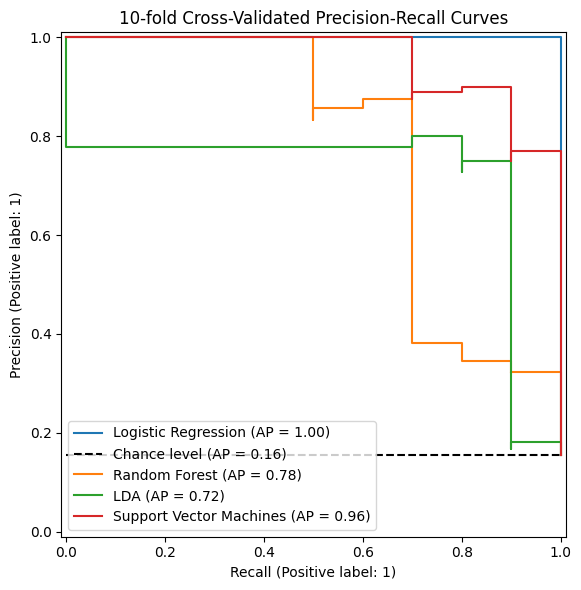

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_predictions(target, cross_val_prediction_LR, name="Logistic Regression",plot_chance_level=True, ax = ax)
PrecisionRecallDisplay.from_predictions(target, cross_val_prediction_RF, name="Random Forest",ax = ax)
PrecisionRecallDisplay.from_predictions(target, cross_val_prediction_LDA, name="LDA", ax = ax)
PrecisionRecallDisplay.from_predictions(target, cross_val_prediction_SVM, name="Support Vector Machines", ax=ax)
ax.set_title("10-fold Cross-Validated Precision-Recall Curves")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [ ]:
fprLR, tprLR, _ = roc_curve(target, cross_val_prediction_LR)
roc_aucLR = auc(fprLR, tprLR)
fprLDA, tprLDA, _ = roc_curve(target, cross_val_prediction_LDA)
roc_aucLDA = auc(fprLDA, tprLDA)
fprRF, tprRF, _ = roc_curve(target, cross_val_prediction_RF)
roc_aucRF = auc(fprRF, tprRF)
fprSVM, tprSVM, _ = roc_curve(target, cross_val_prediction_SVM)
roc_aucSVM = auc(fprSVM, tprSVM)

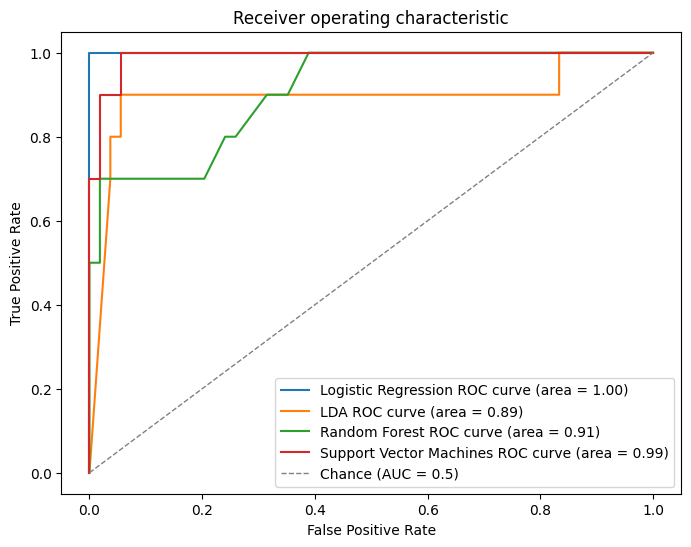

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(
    fprLR,
    tprLR,
    label="Logistic Regression ROC curve (area = %0.2f)" % roc_aucLR,
)
ax.plot(
    fprLDA,
    tprLDA,
    label="LDA ROC curve (area = %0.2f)" % roc_aucLDA,
)
ax.plot(
    fprRF,
    tprRF,
    label="Random Forest ROC curve (area = %0.2f)" % roc_aucRF,
)
ax.plot(
    fprSVM,
    tprSVM,
    label="Support Vector Machines ROC curve (area = %0.2f)" % roc_aucSVM,
)
ax.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1, label="Chance (AUC = 0.5)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Receiver operating characteristic")
ax.legend(loc="lower right")
plt.show()